# Tarea 3 – Narrativa visual con datos  
### Brecha digital global en el uso de Internet (1990–2023)

Alumnos: Valentina Carné ​/ Camila Figueroa ​/ Néctor Felipe Ruiz​ / María José Vásquez

Profesor: Carlos Pérez

Curso: Visualización de Datos y Storytelling

Este notebook desarrolla el **análisis exploratorio de datos (EDA)** y el **storytelling** para la Tarea 3 del curso **Visualización de Datos y Storytelling**.

- **Dataset:** `share-of-individuals-using-the-internet.csv` — Our World in Data  
- **Variable principal:** `Individuals using the Internet (% of population)`  
- **Unidad de análisis:** países y regiones (incluidas regiones del Banco Mundial)  
- **Rango temporal aproximado:** 1990–2023  
- **Framework narrativo elegido:** **Estructura de 3 actos** (Planteamiento – Conflicto – Resolución).  

La estructura del notebook está organizada en tres grandes partes:

1. **EDA profesional** – entender a fondo el dataset, su estructura y patrones.  
2. **Storytelling** – traducir el análisis en una narrativa coherente en 3 actos.  
3. **Síntesis, mensaje central y recomendación accionable** – en línea con la rúbrica de la Tarea 3.


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px

plt.style.use("default")  # estilo simple y limpio

# Carpeta para guardar figuras
FIGURES_DIR = Path("figures")
FIGURES_DIR.mkdir(exist_ok=True, parents=True)

# Ruta del dataset: asumimos que el CSV está en la MISMA carpeta que este notebook
DATA_PATH = Path("share-of-individuals-using-the-internet.csv")
DATA_PATH

WindowsPath('share-of-individuals-using-the-internet.csv')

> 💡 **Nota:** Para ejecutar este notebook sin errores, asegúrate de que el archivo  
> `share-of-individuals-using-the-internet.csv` esté en la **misma carpeta** que este `.ipynb`.  
> Si decides moverlo a una subcarpeta, actualiza la variable `DATA_PATH` en la celda anterior.


---
# PARTE 1 — Análisis Exploratorio de Datos (EDA)

En esta sección realizamos un EDA estructurado con foco en:

1. Comprender la **estructura del dataset** (filas, columnas, tipos, nulos).  
2. Explorar la **distribución global del uso de Internet** entre países.  
3. Analizar las **tendencias temporales** a nivel global y regional.  
4. Comparar **países representativos** y **países líderes**.  
5. Incorporar la dimensión **geográfica** mediante un mapa mundial (choropleth).

Este EDA servirá como base para la narrativa posterior.


## 1. Carga del dataset y exploración básica

In [83]:
# Cargamos el dataset
df = pd.read_csv(DATA_PATH)

df.head()

,Entity,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [84]:
# Información básica del dataset
print("Shape (filas, columnas):", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nRango temporal de la variable 'Year':")
print(df['Year'].min(), "→", df['Year'].max())

print("\nNúmero de entidades únicas (países + regiones):", df['Entity'].nunique())

Shape (filas, columnas): (7151, 4)

Columnas:
['Entity', 'Code', 'Year', 'Individuals using the Internet (% of population)']

Tipos de datos:
Entity                                               object
Code                                                 object
Year                                                  int64
Individuals using the Internet (% of population)    float64
dtype: object

Valores nulos por columna:
Entity                                                0
Code                                                434
Year                                                  0
Individuals using the Internet (% of population)      0
dtype: int64

Rango temporal de la variable 'Year':
1960 → 2023

Número de entidades únicas (países + regiones): 226


### EDA 

> **Descripción del dataset:**  
> El dataset de Our World in Data contiene más de **7.000 observaciones** que registran el porcentaje de personas que utilizan Internet (`Individuals using the Internet (% of population)`) por país y por región.  
>  
> Incluye:
> - Más de **200 entidades** (entre países y agregados regionales).  
> - Un rango temporal que va aproximadamente desde **1990** hasta **2023**.  
> - Cuatro columnas principales: nombre de la entidad (`Entity`), código (`Code`), año (`Year`) y porcentaje de usuarios de Internet sobre la población total.  
>  
> Esta estructura permite analizar la evolución del acceso a Internet a lo largo del tiempo, comparar países y regiones, estudiar distribuciones y construir visualizaciones geográficas.


## 2. Filtrado de países vs. regiones

Dado que el dataset mezcla países y regiones (por ejemplo, *East Asia and Pacific (WB)*), distinguimos entre:

- **Países:** filas con `Code` definido (códigos ISO de país).  
- **Regiones:** filas sin `Code`, que agrupan varios países.

Para el EDA distribucional trabajaremos principalmente con países.


In [85]:
# Países = filas con código definido
df_countries = df[df['Code'].notna()].copy()
df_regions = df[df['Code'].isna()].copy()

print("Filas (países):", df_countries.shape[0])
print("Filas (regiones):", df_regions.shape[0])
print("\nEjemplo de países:")
print(df_countries['Entity'].unique()[:10])
print("\nEjemplo de regiones/mundiales:")
print(df_regions['Entity'].unique()[:10])

Filas (países): 6717
Filas (regiones): 434

Ejemplo de países:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']

Ejemplo de regiones/mundiales:
['East Asia and Pacific (WB)' 'Europe and Central Asia (WB)'
 'European Union (27)' 'Faeroe Islands' 'High-income countries'
 'Latin America and Caribbean (WB)' 'Low-income countries'
 'Lower-middle-income countries' 'Middle East and North Africa (WB)'
 'North America (WB)']


### Países vs regiones

> Para el análisis exploratorio, diferenciamos entre **países individuales** (que tienen un código ISO asociado) y **regiones agregadas** (como “Sub-Saharan Africa (WB)”).  
>  
> Esta distinción nos permite mirar la desigualdad digital desde dos niveles:  
> - **Micro:** diferencias entre países.  
> - **Macro:** diferencias entre grandes regiones del mundo.


## 3. Distribución global del uso de Internet entre países

Como primer paso del EDA, analizamos cómo se distribuye el porcentaje de usuarios de Internet entre países en un año reciente (por ejemplo, **2020**).

In [86]:
year_ref = 2020
data_ref = df_countries[df_countries['Year'] == year_ref]['Individuals using the Internet (% of population)'].dropna()

print(f"Número de países con dato en {year_ref}:", data_ref.shape[0])
print("\nEstadísticos descriptivos:")
print(data_ref.describe())

Número de países con dato en 2020: 193

Estadísticos descriptivos:
count    193.000000
mean      64.465417
std       26.134651
min        7.400000
25%       41.954292
50%       72.112800
75%       85.471000
max      100.000000
Name: Individuals using the Internet (% of population), dtype: float64


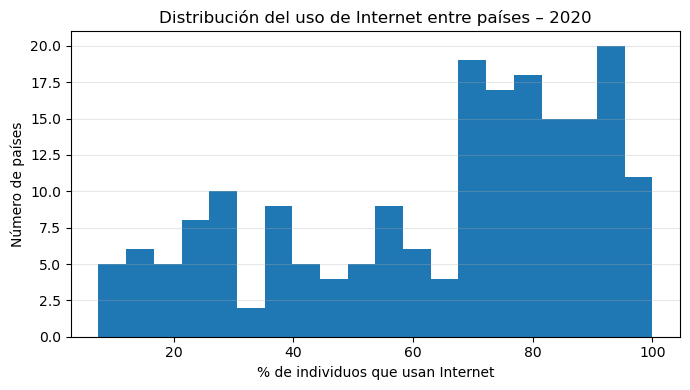

In [87]:
# Histograma
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(data_ref, bins=20)
ax.set_title(f"Distribución del uso de Internet entre países – {year_ref}")
ax.set_xlabel("% de individuos que usan Internet")
ax.set_ylabel("Número de países")
ax.grid(axis="y", alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / f"hist_paises_{year_ref}.png", dpi=300)
plt.show()

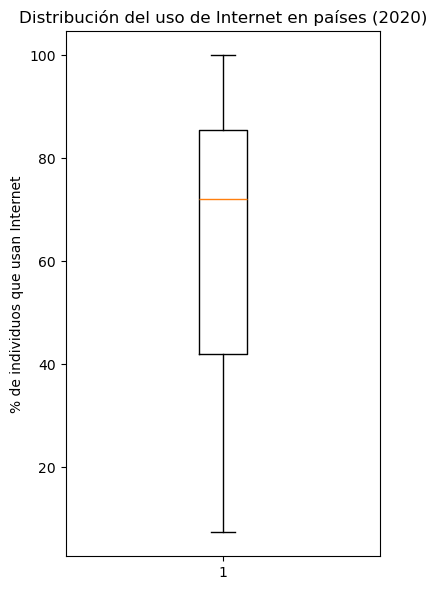

In [88]:
# Boxplot
fig, ax = plt.subplots(figsize=(4, 6))
ax.boxplot(data_ref, vert=True)
ax.set_title(f"Distribución del uso de Internet en países ({year_ref})")
ax.set_ylabel("% de individuos que usan Internet")

fig.tight_layout()
fig.savefig(FIGURES_DIR / f"boxplot_paises_{year_ref}.png", dpi=300)
plt.show()

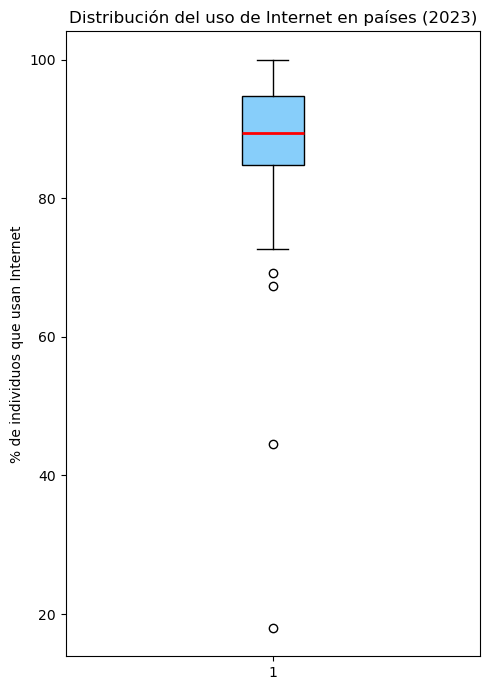

In [89]:
import matplotlib.pyplot as plt

# Año que quieres graficar
year_ref = 2023

# Filtrar datos del año y eliminar valores faltantes
data_ref = (
    df_countries[df_countries["Year"] == year_ref]
    ["Individuals using the Internet (% of population)"]
    .dropna()
)

# --- Boxplot ---
fig, ax = plt.subplots(figsize=(5, 7))  # más grande y legible

ax.boxplot(data_ref, vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA"),   # azul suave
           medianprops=dict(color="red", linewidth=2))

ax.set_title(f"Distribución del uso de Internet en países ({year_ref})")
ax.set_ylabel("% de individuos que usan Internet")

fig.tight_layout()

# Guardar imagen
fig.savefig(FIGURES_DIR / f"boxplot_paises_{year_ref}.png", dpi=300)

plt.show()

### Distribución global

> En el año 2020, la distribución del porcentaje de usuarios de Internet entre países es **altamente heterogénea**.  
>  
> - El histograma muestra una concentración importante de países con niveles altos de conectividad (sobre el 70%).  
> - Sin embargo, el boxplot revela una **cola inferior larga**, indicando que todavía existe un grupo relevante de países con menos del 30% de la población usando Internet.  
>  
> Este contraste es una primera señal clara de **desigualdad digital global**.


## 4. Tendencias temporales globales y por región

A continuación analizamos cómo cambia el uso de Internet a lo largo del tiempo:

1. A nivel **global promedio** (promedio simple entre países).  
2. A nivel de **regiones del Banco Mundial**.


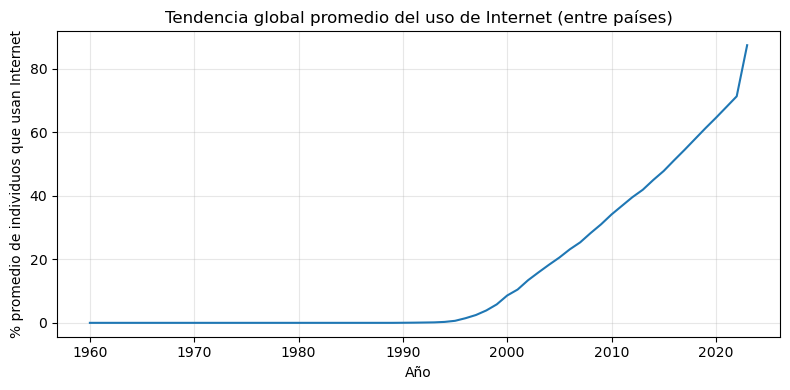

In [90]:
# Tendencia global promedio (entre países)
global_trend = (
    df_countries
    .groupby('Year')['Individuals using the Internet (% of population)']
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(global_trend['Year'], global_trend['Individuals using the Internet (% of population)'])
ax.set_title("Tendencia global promedio del uso de Internet (entre países)")
ax.set_xlabel("Año")
ax.set_ylabel("% promedio de individuos que usan Internet")
ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "tendencia_global_promedio.png", dpi=300)
plt.show()

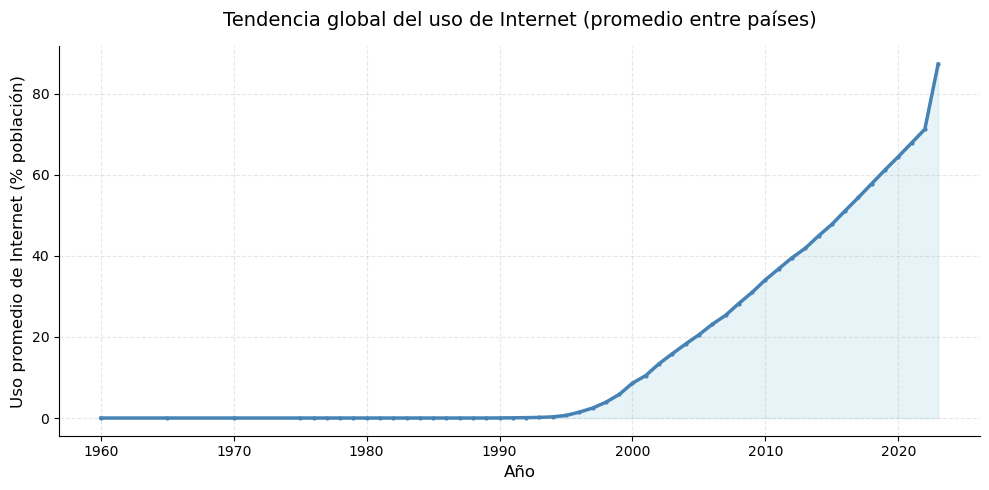

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Tendencia global promedio (entre países)
global_trend = (
    df_countries
    .groupby('Year')['Individuals using the Internet (% of population)']
    .mean()
    .reset_index()
)

# Datos
years = global_trend['Year']
values = global_trend['Individuals using the Internet (% of population)']

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(10, 5))

# Línea principal
ax.plot(
    years,
    values,
    color="steelblue",        # naranja-rojo elegante
    linewidth=2.5,
    marker="o",
    markersize=2
)

# Sombreado suave
ax.fill_between(
    global_trend['Year'],
    global_trend['Individuals using the Internet (% of population)'],
    color='lightblue',       # <<< cambia este color
    alpha=0.3                # <<< nivel de transparencia
)

# Estética del gráfico
ax.set_title(
    "Tendencia global del uso de Internet (promedio entre países)",
    fontsize=14,
    pad=15
)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Uso promedio de Internet (% población)", fontsize=12)

ax.grid(True, linestyle="--", alpha=0.3)

# Quitar bordes extra
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.tight_layout()

# Guardado
fig.savefig(FIGURES_DIR / "tendencia_global_promedio.png", dpi=300)

plt.show()

### Tendencia global

> Si promediamos el porcentaje de usuarios de Internet entre todos los países, observamos una **curva de adopción típica de tecnologías digitales**: un crecimiento muy lento en los años noventa, seguido por una aceleración marcada a partir de los 2000 y una tendencia a estabilizarse en niveles altos en la última década.  
>  
> Esta visión global oculta, sin embargo, diferencias importantes entre regiones y países, que abordamos a continuación.


## 5. Tendencias por región del Banco Mundial

Seleccionamos cuatro regiones clave del Banco Mundial para el posterior storytelling:

- **East Asia and Pacific (WB)**  
- **South Asia (WB)**  
- **North America (WB)**  
- **Sub-Saharan Africa (WB)**  


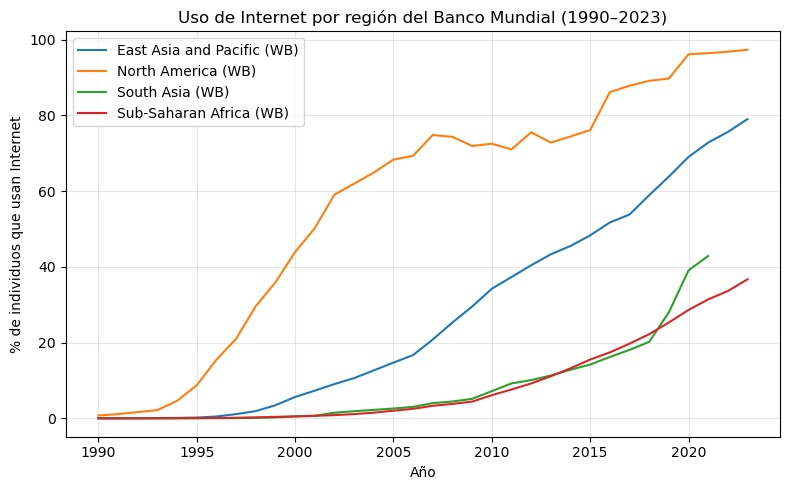

In [92]:
regions = [
    "East Asia and Pacific (WB)",
    "North America (WB)",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)",
]

df_regions_wb = df_regions[df_regions["Entity"].isin(regions)].copy()
df_regions_wb = df_regions_wb.sort_values(["Entity", "Year"])

fig, ax = plt.subplots(figsize=(8, 5))
for region in regions:
    subset = df_regions_wb[df_regions_wb["Entity"] == region]
    ax.plot(
        subset["Year"],
        subset["Individuals using the Internet (% of population)"],
        label=region,
    )

ax.set_title("Uso de Internet por región del Banco Mundial (1990–2023)")
ax.set_xlabel("Año")
ax.set_ylabel("% de individuos que usan Internet")
ax.legend()
ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "series_regiones_WB.png", dpi=300)
plt.show()

###  Regiones WB

> Al desagregar la evolución del uso de Internet por grandes regiones del Banco Mundial, observamos trayectorias muy distintas:  
>  
> - **Norteamérica** alcanza rápidamente niveles superiores al 90% de la población conectada.  
> - **Asia Oriental y el Pacífico** muestra una adopción acelerada desde comienzos de los 2000.  
> - **Asia del Sur** avanza de forma más gradual.  
> - **África Subsahariana** crece, pero desde niveles muy bajos y sin acercarse a las regiones más desarrolladas.  
>  
> Esta comparación introduce de forma natural la **brecha digital entre regiones**, que será el núcleo del storytelling.


## 6. Comparación entre países representativos

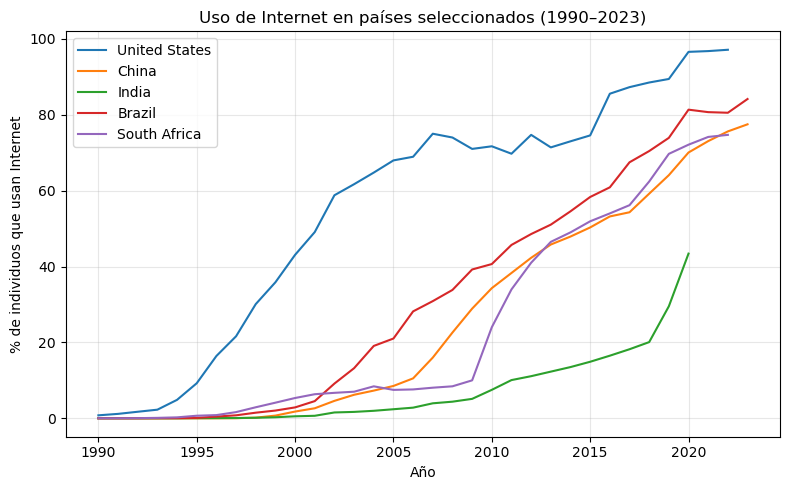

In [93]:
selected_countries = ["United States", "China", "India", "Brazil", "South Africa"]

df_sel = df_countries[df_countries["Entity"].isin(selected_countries)].copy()

fig, ax = plt.subplots(figsize=(8, 5))
for country in selected_countries:
    sub = df_sel[df_sel["Entity"] == country]
    ax.plot(
        sub["Year"],
        sub["Individuals using the Internet (% of population)"],
        label=country,
    )

ax.set_title("Uso de Internet en países seleccionados (1990–2023)")
ax.set_xlabel("Año")
ax.set_ylabel("% de individuos que usan Internet")
ax.legend()
ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "paises_seleccionados_series.png", dpi=300)
plt.show()

###  Países representativos

> La comparación entre países ilustra cómo el contexto económico y político influye en la adopción de Internet:  
>  
> - **Estados Unidos** alcanza rápidamente niveles cercanos a la saturación (>90%).  
> - **China** experimenta una aceleración muy marcada a partir de los 2000.  
> - **India** y **Brasil** avanzan de forma sostenida, pero con una brecha respecto a las economías de mayor ingreso.  
> - **Sudáfrica**, siendo uno de los países más conectados de África Subsahariana, sigue claramente por debajo de Estados Unidos o China.  
>  
> Esta sección refuerza la idea de que la brecha digital es tanto **regional** como **intra-regional**.


## 7. Top 10 países por uso de Internet

In [94]:
year_top = 2020

top_data = (
    df_countries[df_countries["Year"] == year_top]
    .dropna(subset=["Individuals using the Internet (% of population)"])
    .sort_values("Individuals using the Internet (% of population)", ascending=False)
    .head(10)
)

top_data_short = top_data[["Entity", "Individuals using the Internet (% of population)"]]
top_data_short

,Entity,Individuals using the Internet (% of population)
6726,United Arab Emirates,100.0000
447,Bahrain,99.6710
5292,Qatar,99.6528
2964,Iceland,99.5328
3422,Kuwait,99.1059
4345,Monaco,98.5709
3837,Luxembourg,98.4596
5613,Saudi Arabia,97.8623
6793,United States,96.5768
1660,Denmark,96.5491


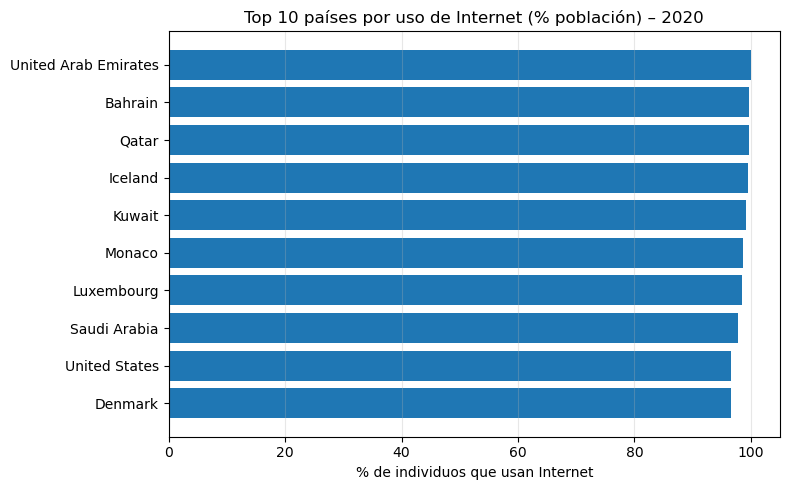

In [95]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(
    top_data["Entity"],
    top_data["Individuals using the Internet (% of population)"],
)
ax.invert_yaxis()

ax.set_title(f"Top 10 países por uso de Internet (% población) – {year_top}")
ax.set_xlabel("% de individuos que usan Internet")
ax.grid(axis="x", alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / f"top10_paises_{year_top}.png", dpi=300)
plt.show()

### Top 10 países

> El ranking de los 10 países con mayor porcentaje de usuarios de Internet en 2020 muestra que varios de ellos superan el **95% de penetración**.  
>  
> Estos casos representan contextos donde el acceso a Internet está prácticamente universalizado, lo que contrasta fuertemente con los países y regiones que todavía no alcanzan ni siquiera un 30% de conectividad.


In [96]:
import plotly.express as px

# Obtener el año más reciente disponible
latest_year = df_countries["Year"].max()

# Filtrar ese año
df_latest = (
    df_countries[df_countries["Year"] == latest_year]
    .dropna(subset=["Individuals using the Internet (% of population)"])
)

# Top 20 países
df_top20 = df_latest.nlargest(
    20, "Individuals using the Internet (% of population)"
).sort_values(
    "Individuals using the Internet (% of population)", ascending=True
)

# --- Gráfico ---
fig_top20 = px.bar(
    df_top20,
    x="Individuals using the Internet (% of population)",
    y="Entity",
    orientation="h",
    color="Individuals using the Internet (% of population)",
    color_continuous_scale="Viridis",
    title=f"Top 20 países con mayor uso de Internet (% población) – {latest_year}",
)

# Aumentar tamaño del gráfico
fig_top20.update_layout(
    width=900,   # ancho en px
    height=700,  # alto en px
    xaxis_title="Uso de Internet (% de la población)",
    yaxis_title="País",
    title_x=0.5  # centrar título
)

# Mostrar
fig_top20.show()

In [97]:
!pip install -U kaleido

In [98]:
import plotly.express as px

# Obtener el año más reciente disponible
latest_year = df_countries["Year"].max()

# Filtrar ese año
df_latest = (
    df_countries[df_countries["Year"] == latest_year]
    .dropna(subset=["Individuals using the Internet (% of population)"])
)

# Bottom 20 países
df_bottom20 = df_latest.nsmallest(
    20, "Individuals using the Internet (% of population)"
).sort_values(
    "Individuals using the Internet (% of population)", ascending=True
)

# --- Gráfico ---
fig_bottom20 = px.bar(
    df_bottom20,
    x="Individuals using the Internet (% of population)",
    y="Entity",
    orientation="h",
    color="Individuals using the Internet (% of population)",
    color_continuous_scale="YlOrRd",   # <<<<<<<<<< CAMBIO DE COLOR
    title=f"20 países con menor uso de Internet (% población) – {latest_year}",
)

# Tamaño del gráfico
fig_bottom20.update_layout(
    width=900,
    height=700,
    xaxis_title="Uso de Internet (% de la población)",
    yaxis_title="País",
    title_x=0.5
)

fig_bottom20.show()

## 8. Mapa mundial (choropleth) del uso de Internet

In [99]:
year_map = 2020

map_data = (
    df_countries[df_countries['Year'] == year_map]
    .dropna(subset=['Individuals using the Internet (% of population)', 'Code'])
)

fig_map = px.choropleth(
    map_data,
    locations="Code",
    color="Individuals using the Internet (% of population)",
    hover_name="Entity",
    color_continuous_scale="Viridis",
    title=f"Uso de Internet en el mundo (% población) – {year_map}",
)

# 🔵 Aumentar tamaño del mapa
fig_map.update_layout(
    width=1200,
    height=700,
    paper_bgcolor="white",
    plot_bgcolor="white",
    margin=dict(l=0, r=0, t=50, b=0)
)

fig_map.show()

In [100]:

year_map = 2023
fig_map = px.choropleth(
    map_data,
    locations="Code",
    color="Individuals using the Internet (% of population)",
    hover_name="Entity",
    color_continuous_scale=px.colors.sequential.Viridis,   
    title=f"Uso de Internet en el mundo (% población) – {year_map}",
)

fig_map.update_layout(
    width=1200,
    height=700,
    margin=dict(l=0, r=0, t=60, b=0),
    
    # Fondo limpio
    paper_bgcolor="white",
    plot_bgcolor="white",
    
    # Título 
    title=dict(
        x=0.5,
        y=0.95,
        font=dict(size=22, family="Arial", color="black")
    ),
    
    # Barra de colores estilizada
    coloraxis_colorbar=dict(
        title="Uso de Internet (%)",
        titlefont=dict(size=14),
        thickness=18,
        ticks="outside",
        ticklen=6
    )
)

# Líneas de fronteras más suaves
fig_map.update_geos(
    showcoastlines=False,
    showland=True,
    landcolor="rgb(240,240,240)",
    showcountries=True,
    countrycolor="white",
    projection_type="natural earth"
)

fig_map.show()

###  Mapa mundial

> El mapa mundial de 2020 muestra un patrón claro:  
> - Niveles muy altos de uso de Internet en **Norteamérica, Europa y partes de Asia Oriental**.  
> - Niveles bajos y medios en gran parte de **África Subsahariana** y sectores del **sur de Asia**.  
>  
> Esta visualización hace evidente la **dimensión geográfica de la brecha digital**, que luego se enfatizará en la narrativa.


## 9. Resumen del EDA

### Hallazgos clave

1. El uso de Internet ha crecido de forma **acelerada** en las últimas tres décadas a nivel global.  
2. Existe una **heterogeneidad muy marcada** entre países: algunos superan el 95% de penetración, mientras otros no alcanzan el 20–30%.  
3. A nivel regional, **África Subsahariana** se mantiene sistemáticamente por debajo de regiones como **Norteamérica** o **Asia Oriental–Pacífico**.  
4. La geografía importa: el mapa mundial revela zonas completas del planeta con baja conectividad.  

Estos hallazgos motivan la siguiente pregunta narrativa:  

> **¿Las regiones del mundo están convergiendo en niveles de acceso a Internet, o la brecha digital entre ellas se mantiene e incluso se amplía con el tiempo?**


---
# PARTE 2 — Storytelling con datos (Estructura de 3 actos)

## Acto I – Planteamiento

En el planteamiento presentamos el contexto general y la pregunta que guiará la historia.

### Gráfico clave del Acto I – Series por región WB

Para el Acto I reutilizamos el gráfico de uso de Internet por región del Banco Mundial (`series_regiones_WB.png`), generado en la sección de EDA.

### Acto I

> **Acto I – Planteamiento**  
> En las últimas tres décadas, Internet ha pasado de ser una tecnología marginal a convertirse en un requisito básico para el acceso a educación, trabajo, servicios financieros y participación social.  
>  
> Cuando observamos la evolución del uso de Internet en cuatro grandes regiones del mundo —Norteamérica, Asia Oriental–Pacífico, Asia del Sur y África Subsahariana— vemos que **todas muestran una tendencia de crecimiento sostenido**.  
>  
> Sin embargo, incluso en esta primera mirada se observa que **no todas las regiones parten del mismo nivel ni avanzan a la misma velocidad**.  
>  
> Esto nos lleva a la pregunta central de la historia:  
> > *¿Estamos avanzando hacia la convergencia en el acceso a Internet, o algunas regiones se están quedando cada vez más atrás?*


## Acto II – Conflicto

El conflicto narrativo aparece cuando analizamos explícitamente la **brecha digital** entre regiones.

In [101]:
# Preparamos series para Norteamérica y África Subsahariana
na = df_regions_wb[df_regions_wb["Entity"] == "North America (WB)"].set_index("Year")
ssa = df_regions_wb[df_regions_wb["Entity"] == "Sub-Saharan Africa (WB)"].set_index("Year")

common_years = na.index.intersection(ssa.index)

gap = (
    na.loc[common_years]["Individuals using the Internet (% of population)"]
    - ssa.loc[common_years]["Individuals using the Internet (% of population)"]
)

gap.describe()

count    34.000000
mean     48.292450
std      25.239643
min       0.742073
25%      30.879991
50%      61.450000
75%      66.375000
max      71.500000
Name: Individuals using the Internet (% of population), dtype: float64

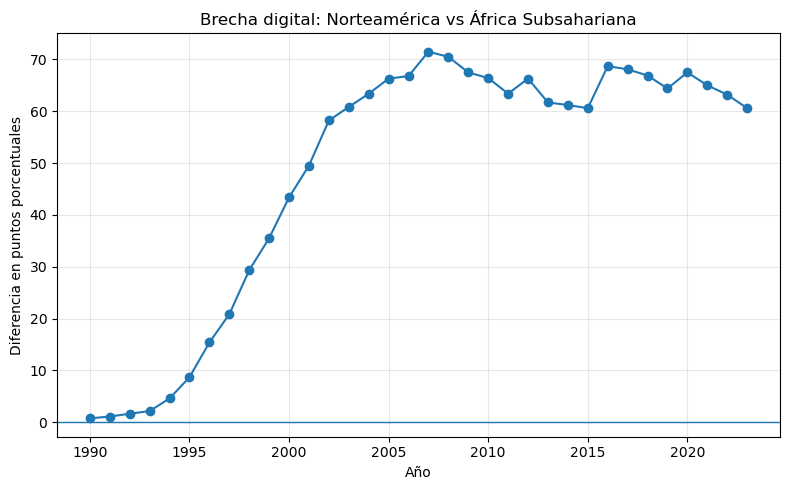

In [102]:
# Gráfico de la brecha
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(common_years, gap, marker="o")

ax.set_title("Brecha digital: Norteamérica vs África Subsahariana")
ax.set_xlabel("Año")
ax.set_ylabel("Diferencia en puntos porcentuales")
ax.axhline(0, linewidth=1)
ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "brecha_na_ssa.png", dpi=300)
plt.show()

### Brecha regional (Acto II)

> **Acto II – Conflicto: la brecha digital**  
> Cuando comparamos directamente a **Norteamérica** con **África Subsahariana**, la historia deja de ser solo de crecimiento y se transforma en una historia de desigualdad.  
>  
> La diferencia en puntos porcentuales entre ambas regiones se **amplía sistemáticamente con el tiempo**:  
> - En los primeros años, la brecha es relativamente pequeña.  
> - A medida que avanzan las décadas, Norteamérica se acerca a la saturación, mientras que África Subsahariana crece mucho más lento.  
>  
> El resultado es que la distancia entre ambas regiones pasa de ser marginal a convertirse en una **brecha estructural** de varias decenas de puntos porcentuales.


In [103]:
# Crecimiento en los últimos 10 años por región WB seleccionada
last_year = df_regions_wb["Year"].max()
start_period = last_year - 10

growth_summary = []
for region in regions:
    sub = df_regions_wb[df_regions_wb["Entity"] == region].set_index("Year")
    sub_period = sub[(sub.index >= start_period) & (sub.index <= last_year)]["Individuals using the Internet (% of population)"]
    if len(sub_period) > 1:
        growth = sub_period.iloc[-1] - sub_period.iloc[0]
        growth_summary.append({"Region": region, "Growth_last_10_years_pp": growth})

growth_df = pd.DataFrame(growth_summary)
growth_df

,Region,Growth_last_10_years_pp
0,East Asia and Pacific (WB),35.700000
1,North America (WB),24.500000
2,South Asia (WB),31.558028
3,Sub-Saharan Africa (WB),25.600000


C:\Users\mgarc\AppData\Local\Temp\ipykernel_6120\462258962.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



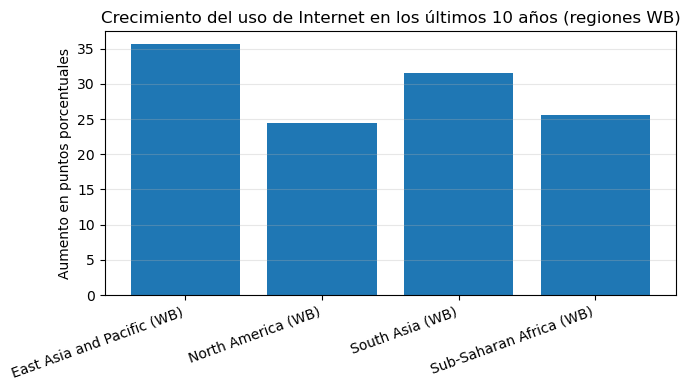

In [104]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(growth_df["Region"], growth_df["Growth_last_10_years_pp"])
ax.set_title("Crecimiento del uso de Internet en los últimos 10 años (regiones WB)")
ax.set_ylabel("Aumento en puntos porcentuales")
ax.set_xticklabels(growth_df["Region"], rotation=20, ha="right")
ax.grid(axis="y", alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "growth_last_10_years_regions.png", dpi=300)
plt.show()

###  Ritmos de crecimiento

> Aunque todas las regiones continúan aumentando su porcentaje de usuarios de Internet en la última década, los **ritmos de crecimiento** no son suficientes para cerrar la brecha:  
>  
> - Regiones que ya partían de niveles altos mantienen incrementos moderados.  
> - Regiones que partían de niveles bajos muestran avances importantes en puntos porcentuales, pero **no logran acercarse al grupo de punta**.  
>  
> Esto refuerza la idea de que el crecimiento orgánico, por sí solo, **no garantiza convergencia digital**.


### Mapa mundial como refuerzo visual del conflicto

En el Acto II, el mapa mundial generado en el EDA puede reutilizarse para reforzar la dimensión geográfica del conflicto: **una desigualdad que no es solo numérica, sino territorial**.


## Acto III – Resolución

En el último acto proyectamos la tendencia y planteamos las implicancias si no se interviene.

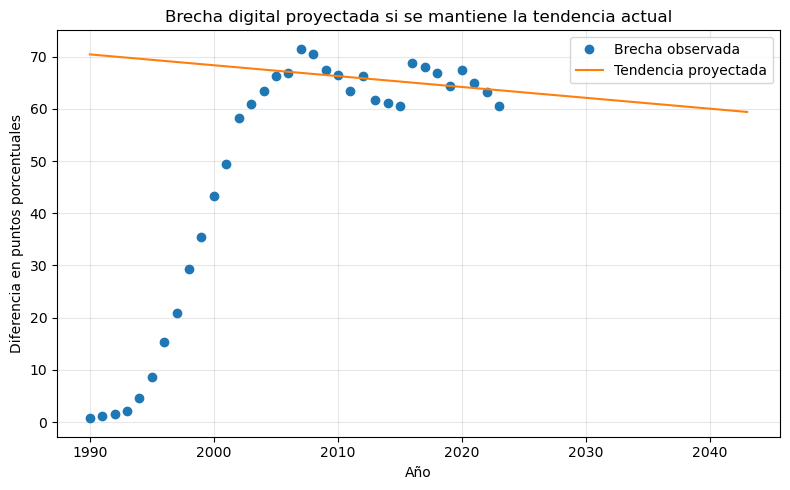

In [105]:
# Proyección lineal simple de la brecha NA vs SSA

years_numeric = common_years.values
mask_last = years_numeric >= (years_numeric.max() - 15)  # últimos ~15 años

x = years_numeric[mask_last]
y = gap.values[mask_last]

coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)

future_years = np.arange(years_numeric.min(), years_numeric.max() + 21)
future_gap = poly(future_years)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(common_years, gap, "o", label="Brecha observada")
ax.plot(future_years, future_gap, "-", label="Tendencia proyectada")

ax.set_title("Brecha digital proyectada si se mantiene la tendencia actual")
ax.set_xlabel("Año")
ax.set_ylabel("Diferencia en puntos porcentuales")
ax.legend()
ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig(FIGURES_DIR / "proyeccion_brecha_na_ssa.png", dpi=300)
plt.show()

###  Acto III (Resolución)

> **Acto III – Resolución**  
> Al proyectar de forma simple la tendencia reciente de la brecha entre Norteamérica y África Subsahariana, observamos que, si nada cambia, **la distancia entre ambas regiones se mantendrá e incluso podría aumentar en las próximas décadas**.  
>  
> Esta proyección no pretende ser un pronóstico exacto, sino una forma de ilustrar el mensaje central de la historia:  
>  
> > *El crecimiento espontáneo del uso de Internet no basta para cerrar la brecha digital. Se requieren políticas e inversiones deliberadas para acelerar la inclusión digital en las regiones más rezagadas.*


---
# PARTE 3 — Mensaje central y recomendación accionable

En esta sección sintetizamos la historia en una frase central y derivamos una recomendación concreta para un tomador de decisiones.


## Mensaje central

> **Aunque el uso de Internet ha aumentado en todas las regiones del mundo, la brecha digital entre África Subsahariana y las regiones más desarrolladas no se reduce; por el contrario, se amplía en el tiempo si no existen políticas activas de inclusión digital.**


## Recomendación accionable

> **Recomendación:**  
> Los gobiernos, organismos multilaterales y actores privados deberían **priorizar inversiones en infraestructura de conectividad, asequibilidad y alfabetización digital en África Subsahariana**, con foco especial en zonas rurales y de bajos ingresos.  
>  
> Estas acciones pueden incluir:
> - Programas de despliegue de redes de banda ancha y móvil en territorios subatendidos.  
> - Planes de acceso a Internet de bajo costo o subsidiados para hogares vulnerables.  
> - Iniciativas de alfabetización digital que permitan a la población usar efectivamente las herramientas en línea.  
>  
> Sin este tipo de intervenciones, la brecha digital no solo persistirá, sino que puede traducirse en nuevas brechas **educativas, laborales y de bienestar** en las próximas décadas.


## Cierre

> A partir de un EDA riguroso y una narrativa estructurada en tres actos, esta historia muestra que la expansión del acceso a Internet no es sinónimo de equidad digital.  
>  
> Los datos no solo describen una realidad; también revelan **la urgencia de decisiones concretas** para que la conectividad sea una oportunidad compartida, y no un nuevo factor de desigualdad.
